Introducing numpy 'digitize' function

https://numpy.org/doc/stable/reference/generated/numpy.digitize.html

and 'bincount'

https://numpy.org/doc/stable/reference/generated/numpy.bincount.html

and some matplotlib plotting

histogram:

https://matplotlib.org/stable/gallery/statistics/hist.html


bar charts:

https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

In [18]:
#I will do some plotting down below...so I will include 'matplotlib'
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#by now, you may have it installed because other packages may have had it as a dependency
# https://matplotlib.org/stable/users/installing/index.html
# conda install -c conda-forge matplotlib   (when in your conda env)
# or
# pip install matplotlib   (when in your conda env)

#import good old numpy!
import numpy as np

In [19]:
#to start, let us make a bunch of numbers(30) between 0 and 10...random
#note 'rand' generates numbers 0-1...so multiply by 10 will give floating points from 0 to 10

nums = 10. * np.random.rand(30)

print(nums)

[5.06369518 6.72948127 4.54638769 2.71417548 7.57682458 3.44902112
 7.99024003 6.45089946 7.72797119 7.20374193 5.41297069 6.51528701
 1.83714368 3.81678291 9.16587543 7.7141827  9.16148387 2.96180717
 8.64795319 1.29615078 4.20752359 2.42353254 0.48619423 2.97548312
 7.92533552 5.9645947  8.40195047 7.85465559 5.58151107 9.54722453]


In [20]:
#now, pretend you wish to 'bin' these values into custom ranges...
#maybe to assign classes or for visuals when plotting, etc.

'''
my custom ranges will be:
- less than 2
- 2-4
- 4-8
- 8+
'''

#turning that into a 'digitize' array:
my_ranges_for_digitizing = np.array([2, 4, 8])

# note that I have 4 ranges, but only 3 elements in my array.
# this is because of the less than the first value and greater than the last value essentially
# create an additional bin



In [21]:
my_binned_numbers = np.digitize(nums, my_ranges_for_digitizing)

print(my_binned_numbers)

#each element in 'my_binned_numbers' indicates which bin the corresponding element in 'nums' belongs to.

[2 2 2 1 2 1 2 2 2 2 2 2 0 1 3 2 3 1 3 0 2 1 0 1 2 2 3 2 2 3]


In [22]:
#optional

#in the documentation, one can adjust the setting for open/closed intervals being right or left
#by default it is right=False so if a number sits on a boundary it will 'belong' to the higher valued bin
print(np.digitize([2, 4], my_ranges_for_digitizing))

print(np.digitize([2, 4], my_ranges_for_digitizing, right=True))


[1 2]
[0 1]


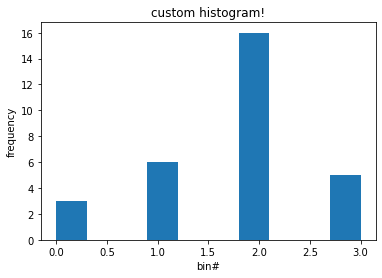

In [23]:
'''
back to our binned numbers.  we have an array of integers depicting which 'bin' they belong to:

0: less than 2
1: 2-4
2: 4-8
3: 8+

plot them!

'''

fig, ax = plt.subplots()

ax.hist(my_binned_numbers)

ax.set_ylabel('frequency')
ax.set_xlabel('bin#')
ax.set_title('custom histogram!')

plt.show()



In [33]:
'''
I agree, the x-axis has not so useful labels... bin# 2-ish doesn't mean a whole lot.
let's clean it up.

first thing is using the built-in 'hist' histogram function is a bit of a beast to put custom labels on the 
plot.

let's aim for a barchart which means we now need to know 'how many of each bin'

for this, use numpy.bincount which works on arrays of integers...and returns the count of each interger value!


since we're dealing with random numbers we will see different things

I see:
[ 3  6 16  5]
which means I have 3 elements in bin 0, 6 in bin 1, and so on

'''
bin_counts = np.bincount(my_binned_numbers)
print(bin_counts)



[ 3  6 16  5]


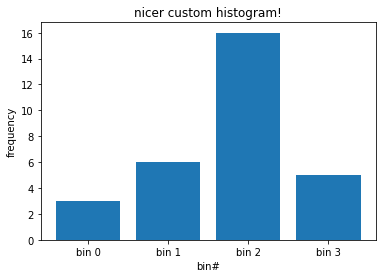

In [35]:
fig, ax = plt.subplots()

ax.bar(['bin 0', 'bin 1', 'bin 2', 'bin 3'], bin_counts)

ax.set_title('nicer custom histogram!')

ax.set_ylabel('frequency')
ax.set_xlabel('bin#')

plt.show()
